In [1]:
#可以忽略前面的 - 调参看看，有面留痕如果改parameter方便
# pip install bayesian-optimization
# 运行需要在agent里加running - 只看output


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mesa.batchrunner import FixedBatchRunner
from Environment import SIERDModel
import random

# 定义变量和范围
param_ranges = {
    'transmission_rate': (0.1, 1.0),
    'latency_period': (1, 30),
    'infection_duration': (10, 100),
    'recovery_rate': (0.1, 1.0),
    'initial_infected': (10, 90)
}

# 设置重复次数和步数
replicates = 30
max_steps = 500

# 固定参数
fixed_params = {
    'width': 10,
    'height': 10,
    'density': 0.9,
    'policy': "No Interventions",
    'num_districts': 5
}

# 定义输出
model_reporters = {
    "Infected": lambda m: sum([1 for agent in m.schedule.agents if agent.state == "Infected"]),
    "Recovered": lambda m: sum([1 for agent in m.schedule.agents if agent.state == "Recovered"]),
    "Dead": lambda m: sum([1 for agent in m.schedule.agents if agent.state == "Dead"])
}

def run_model(params):
    """运行模型并返回目标变量（例如感染者数量）的值"""
    batch = FixedBatchRunner(SIERDModel,
                            max_steps=max_steps,
                            iterations=replicates,
                            fixed_parameters=params,
                            model_reporters=model_reporters)
    batch.run_all()
    df = batch.get_model_vars_dataframe()
    return df['Infected'].mean()  # 返回平均感染者数量

def random_search(param_ranges, num_iterations):
    """随机搜索优化"""
    best_params = None
    best_score = float('inf')  # 找到最小的感染者数量
    all_results = []

    for i in range(num_iterations):
        params = {key: random.uniform(*value) if isinstance(value, tuple) else random.choice(value)
                  for key, value in param_ranges.items()}
        params.update(fixed_params)
        
        # 确保整数参数为整数
        params['latency_period'] = int(params['latency_period'])
        params['infection_duration'] = int(params['infection_duration'])
        params['initial_infected'] = int(params['initial_infected'])
        
        score = run_model(params)
        all_results.append((params, score))

        if score < best_score:
            best_score = score
            best_params = params

        print(f"Iteration {i + 1}/{num_iterations}, Score: {score}, Params: {params}")

    return best_params, best_score, all_results

# 设置随机搜索的迭代次数
num_iterations = 50

# 运行随机搜索
best_params, best_score, all_results = random_search(param_ranges, num_iterations)

print("Best parameters found:", best_params)
print("Best score:", best_score)

# 绘制结果
def plot_search_results(results):
    scores = [score for _, score in results]
    plt.plot(range(len(scores)), scores)
    plt.xlabel('Iteration')
    plt.ylabel('Score (Mean Infected)')
    plt.title('Random Search Optimization')
    plt.show()

plot_search_results(all_results)


0it [00:00, ?it/s]


AttributeError: 'SIERDModel' object has no attribute 'running'

|   iter    |  target   | infect... | initia... | latenc... | recove... | transm... |
-------------------------------------------------------------------------------------


30it [00:05,  5.70it/s]


| 1         | -0.0      | 47.53     | 67.63     | 1.003     | 0.3721    | 0.2321    |


30it [00:05,  5.71it/s]


| 2         | -0.0      | 18.31     | 24.9      | 11.02     | 0.4571    | 0.5849    |


30it [00:05,  5.08it/s]


| 3         | -0.0      | 47.73     | 64.82     | 6.929     | 0.8903    | 0.1246    |


30it [00:05,  5.75it/s]


| 4         | -0.0      | 70.34     | 43.38     | 17.2      | 0.2263    | 0.2783    |


30it [00:05,  5.17it/s]


| 5         | -1.433    | 82.07     | 87.46     | 10.09     | 0.7231    | 0.8888    |


30it [00:04,  6.04it/s]


| 6         | -0.1667   | 90.51     | 16.8      | 2.133     | 0.2528    | 0.8903    |


30it [00:05,  5.51it/s]


| 7         | -0.0      | 18.85     | 43.69     | 28.78     | 0.5798    | 0.7227    |


30it [00:04,  6.27it/s]


| 8         | -0.0      | 38.4      | 64.92     | 25.2      | 0.1165    | 0.7751    |


30it [00:05,  5.12it/s]


| 9         | -16.27    | 99.0      | 69.85     | 9.133     | 0.8104    | 0.1929    |


30it [00:05,  5.80it/s]


| 10        | -0.0      | 50.31     | 82.69     | 9.515     | 0.359     | 0.217     |


30it [00:05,  5.43it/s]


| 11        | -0.2333   | 49.22     | 67.4      | 1.411     | 0.6401    | 0.6032    |


30it [00:04,  6.23it/s]


| 12        | -0.0      | 54.15     | 16.58     | 22.24     | 0.1       | 0.1       |


30it [00:04,  6.21it/s]


| 13        | -0.0      | 10.0      | 67.92     | 1.0       | 0.1       | 0.1       |


30it [00:06,  4.89it/s]


| 14        | -0.0      | 10.0      | 90.0      | 30.0      | 1.0       | 0.1       |


30it [00:04,  6.23it/s]


| 15        | -0.0      | 45.5      | 34.44     | 1.0       | 0.1       | 0.1       |


30it [00:05,  5.14it/s]


| 16        | -52.2     | 86.83     | 10.0      | 30.0      | 1.0       | 1.0       |


30it [00:06,  4.94it/s]


| 17        | -0.0      | 28.67     | 10.0      | 30.0      | 1.0       | 1.0       |


30it [00:04,  6.30it/s]


| 18        | -0.0      | 45.05     | 37.75     | 30.0      | 0.1       | 0.1       |


30it [00:06,  4.74it/s]


| 19        | -72.67    | 41.51     | 10.0      | 1.0       | 1.0       | 1.0       |


30it [00:05,  5.66it/s]


| 20        | -0.0      | 31.01     | 48.15     | 8.657     | 0.3406    | 0.474     |


30it [00:06,  4.87it/s]


| 21        | -2.033    | 25.35     | 83.6      | 11.81     | 1.0       | 1.0       |


30it [00:05,  5.58it/s]


| 22        | -0.0      | 10.54     | 66.94     | 24.59     | 0.4798    | 0.5352    |


30it [00:06,  4.66it/s]


| 23        | -0.0      | 10.99     | 22.95     | 29.23     | 0.767     | 0.6981    |


30it [00:05,  5.64it/s]


| 24        | -0.0      | 65.42     | 71.62     | 30.0      | 0.1       | 0.1       |


30it [00:04,  6.02it/s]


| 25        | -0.0      | 10.0      | 42.67     | 1.0       | 0.1       | 0.1       |


30it [00:04,  6.02it/s]


| 26        | -0.0      | 60.17     | 46.12     | 1.0       | 0.1       | 0.1       |


30it [00:06,  4.90it/s]


| 27        | -0.0      | 43.78     | 90.0      | 30.0      | 1.0       | 0.1       |


30it [00:05,  5.99it/s]


| 28        | -0.0      | 100.0     | 36.77     | 1.0       | 0.1       | 0.1       |


30it [00:05,  5.90it/s]


| 29        | -0.0      | 74.14     | 90.0      | 30.0      | 0.1       | 1.0       |


30it [00:06,  4.93it/s]


| 30        | -0.3      | 99.82     | 89.03     | 29.55     | 0.7313    | 0.2261    |


30it [00:06,  4.67it/s]


| 31        | -83.0     | 78.45     | 33.27     | 1.0       | 1.0       | 1.0       |


30it [00:05,  5.16it/s]


| 32        | -0.0      | 52.09     | 46.93     | 15.55     | 0.1       | 0.1       |


30it [00:05,  5.67it/s]


| 33        | -0.0      | 63.59     | 51.37     | 29.95     | 0.1       | 0.1       |


30it [00:05,  5.48it/s]


| 34        | -0.0      | 66.3      | 60.57     | 14.17     | 0.1       | 0.1       |


30it [00:06,  4.87it/s]


| 35        | -0.0      | 29.19     | 28.36     | 28.78     | 1.0       | 1.0       |


30it [00:06,  4.47it/s]


| 36        | -0.0      | 24.31     | 64.2      | 12.06     | 1.0       | 0.1       |


30it [00:04,  6.20it/s]


| 37        | -0.0      | 26.03     | 79.87     | 29.91     | 0.1063    | 0.9711    |


30it [00:05,  5.74it/s]


| 38        | -0.0      | 82.71     | 56.55     | 30.0      | 0.1       | 0.1       |


30it [00:04,  6.11it/s]


| 39        | -0.0      | 61.74     | 32.01     | 30.0      | 0.1       | 0.1       |


30it [00:05,  5.75it/s]


| 40        | -0.0      | 100.0     | 10.0      | 1.0       | 0.1       | 0.1       |
Best parameters found: {'infection_duration': 47.53198042323166, 'initial_infected': 67.62595947537265, 'latency_period': 1.0033168697030017, 'recovery_rate': 0.3720993153686558, 'transmission_rate': 0.23208030173540176}
Best score: 0.0


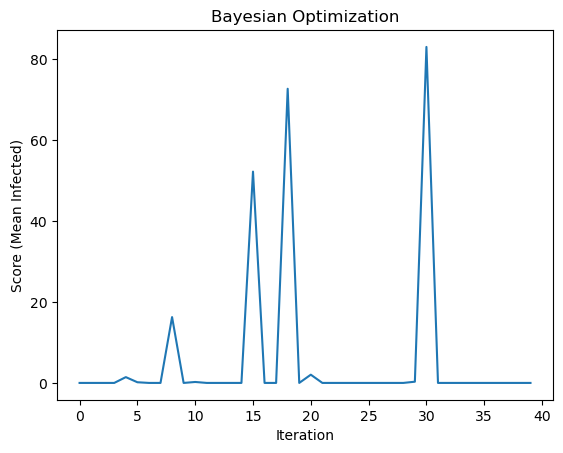

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mesa.batchrunner import FixedBatchRunner
from Environment import SIERDModel
from bayes_opt import BayesianOptimization

# 定义变量和范围
param_bounds = {
    'transmission_rate': (0.1, 1.0),
    'latency_period': (1, 30),
    'infection_duration': (10, 100),
    'recovery_rate': (0.1, 1.0),
    'initial_infected': (10, 90)
}

# 设置重复次数和步数
replicates = 30
max_steps = 500

# 固定参数
fixed_params = {
    'width': 10,
    'height': 10,
    'density': 0.9,
    'policy': "No Interventions",
    'num_districts': 5
}

# 定义输出
model_reporters = {
    "Infected": lambda m: sum([1 for agent in m.schedule.agents if agent.state == "Infected"]),
    "Recovered": lambda m: sum([1 for agent in m.schedule.agents if agent.state == "Recovered"]),
    "Dead": lambda m: sum([1 for agent in m.schedule.agents if agent.state == "Dead"])
}

def run_model(transmission_rate, latency_period, infection_duration, recovery_rate, initial_infected):
    """运行模型并返回目标变量（例如感染者数量）的值"""
    params = fixed_params.copy()
    params.update({
        'transmission_rate': transmission_rate,
        'latency_period': int(latency_period),
        'infection_duration': int(infection_duration),
        'recovery_rate': recovery_rate,
        'initial_infected': int(initial_infected)
    })
    
    batch = FixedBatchRunner(SIERDModel,
                            max_steps=max_steps,
                            iterations=replicates,
                            fixed_parameters=params,
                            model_reporters=model_reporters)
    batch.run_all()
    df = batch.get_model_vars_dataframe()
    return -df['Infected'].mean()  # 返回平均感染者数量的负值，因为贝叶斯优化是最大化目标函数

# 定义贝叶斯优化器
optimizer = BayesianOptimization(
    f=run_model,
    pbounds=param_bounds,
    random_state=1
)

# 进行优化
optimizer.maximize(
    init_points=10,  # 初始随机搜索次数
    n_iter=30  # 优化迭代次数
)

# 输出最佳参数和得分
best_params = optimizer.max['params']
best_score = -optimizer.max['target']  # 取负值，因为之前取的是负值
print("Best parameters found:", best_params)
print("Best score:", best_score)

# 绘制结果
def plot_optimization_results(logs):
    scores = [-entry['target'] for entry in logs]
    plt.plot(range(len(scores)), scores)
    plt.xlabel('Iteration')
    plt.ylabel('Score (Mean Infected)')
    plt.title('Bayesian Optimization')
    plt.show()

plot_optimization_results(optimizer.res)


Running for variable transmission_rate with 10 valid samples.


300it [00:56,  5.29it/s]


Data collected for transmission_rate:
   density  height  infection_duration  num_districts  width  policy  \
0       10      10                 0.9              5      1     0.1   
1       10      10                 0.9              5      1     0.1   
2       10      10                 0.9              5      1     0.1   
3       10      10                 0.9              5      1     0.1   
4       10      10                 0.9              5      1     0.1   

   initial_infected  latency_period  transmission_rate  Run  Dead  Infected  \
0                15              50                0.1    0    72         0   
1                15              50                0.1    1    61         0   
2                15              50                0.1    2    68         0   
3                15              50                0.1    3    72         0   
4                15              50                0.1    4    66         0   

   Recovered  
0         16  
1         29  
2        

300it [00:50,  5.89it/s]


Data collected for latency_period:
   density  height  infection_duration  num_districts  width  policy  \
0       10      10                 0.9              5      1     0.6   
1       10      10                 0.9              5      1     0.6   
2       10      10                 0.9              5      1     0.6   
3       10      10                 0.9              5      1     0.6   
4       10      10                 0.9              5      1     0.6   

   initial_infected  latency_period  transmission_rate  Run  Dead  Infected  \
0                 1               1                0.3    0    74         0   
1                 1               1                0.3    1    61         0   
2                 1               1                0.3    2    65         0   
3                 1               1                0.3    3    78         0   
4                 1               1                0.3    4    81         0   

   Recovered  
0         16  
1         29  
2         25

300it [00:52,  5.70it/s]


Data collected for infection_duration:
   density  height  infection_duration  num_districts  width  policy  \
0       10      10                  10              5      1     0.6   
1       10      10                  10              5      1     0.6   
2       10      10                  10              5      1     0.6   
3       10      10                  10              5      1     0.6   
4       10      10                  10              5      1     0.6   

   initial_infected  latency_period  transmission_rate  Run  Dead  Infected  \
0                15              10                0.3    0    24         0   
1                15              10                0.3    1    17         0   
2                15              10                0.3    2    28         0   
3                15              10                0.3    3    19         0   
4                15              10                0.3    4    29         0   

   Recovered  
0          8  
1          8  
2       

300it [00:53,  5.61it/s]


Data collected for recovery_rate:
   density  height  infection_duration  recovery_rate  num_districts  width  \
0       10      10                 0.9            0.1              5      1   
1       10      10                 0.9            0.1              5      1   
2       10      10                 0.9            0.1              5      1   
3       10      10                 0.9            0.1              5      1   
4       10      10                 0.9            0.1              5      1   

   policy  initial_infected  latency_period  transmission_rate  Run  Dead  \
0     0.6                15              50                0.1    0    82   
1     0.6                15              50                0.1    1    86   
2     0.6                15              50                0.1    2    85   
3     0.6                15              50                0.1    3    83   
4     0.6                15              50                0.1    4    83   

   Infected  Recovered  
0  

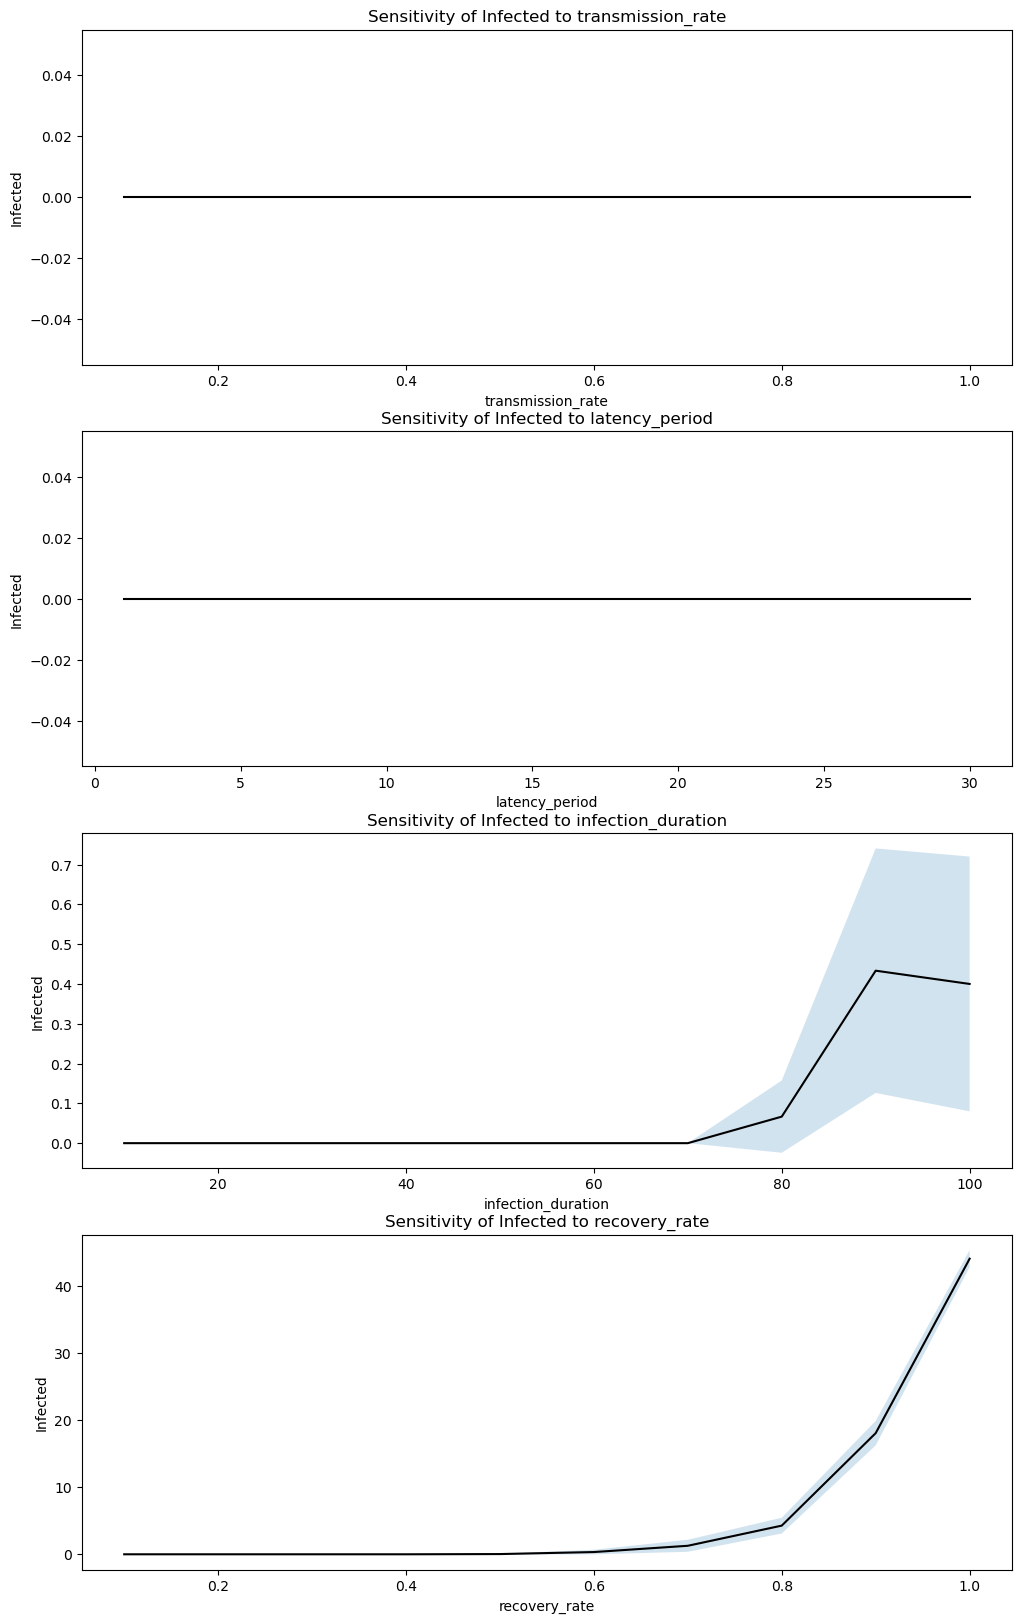

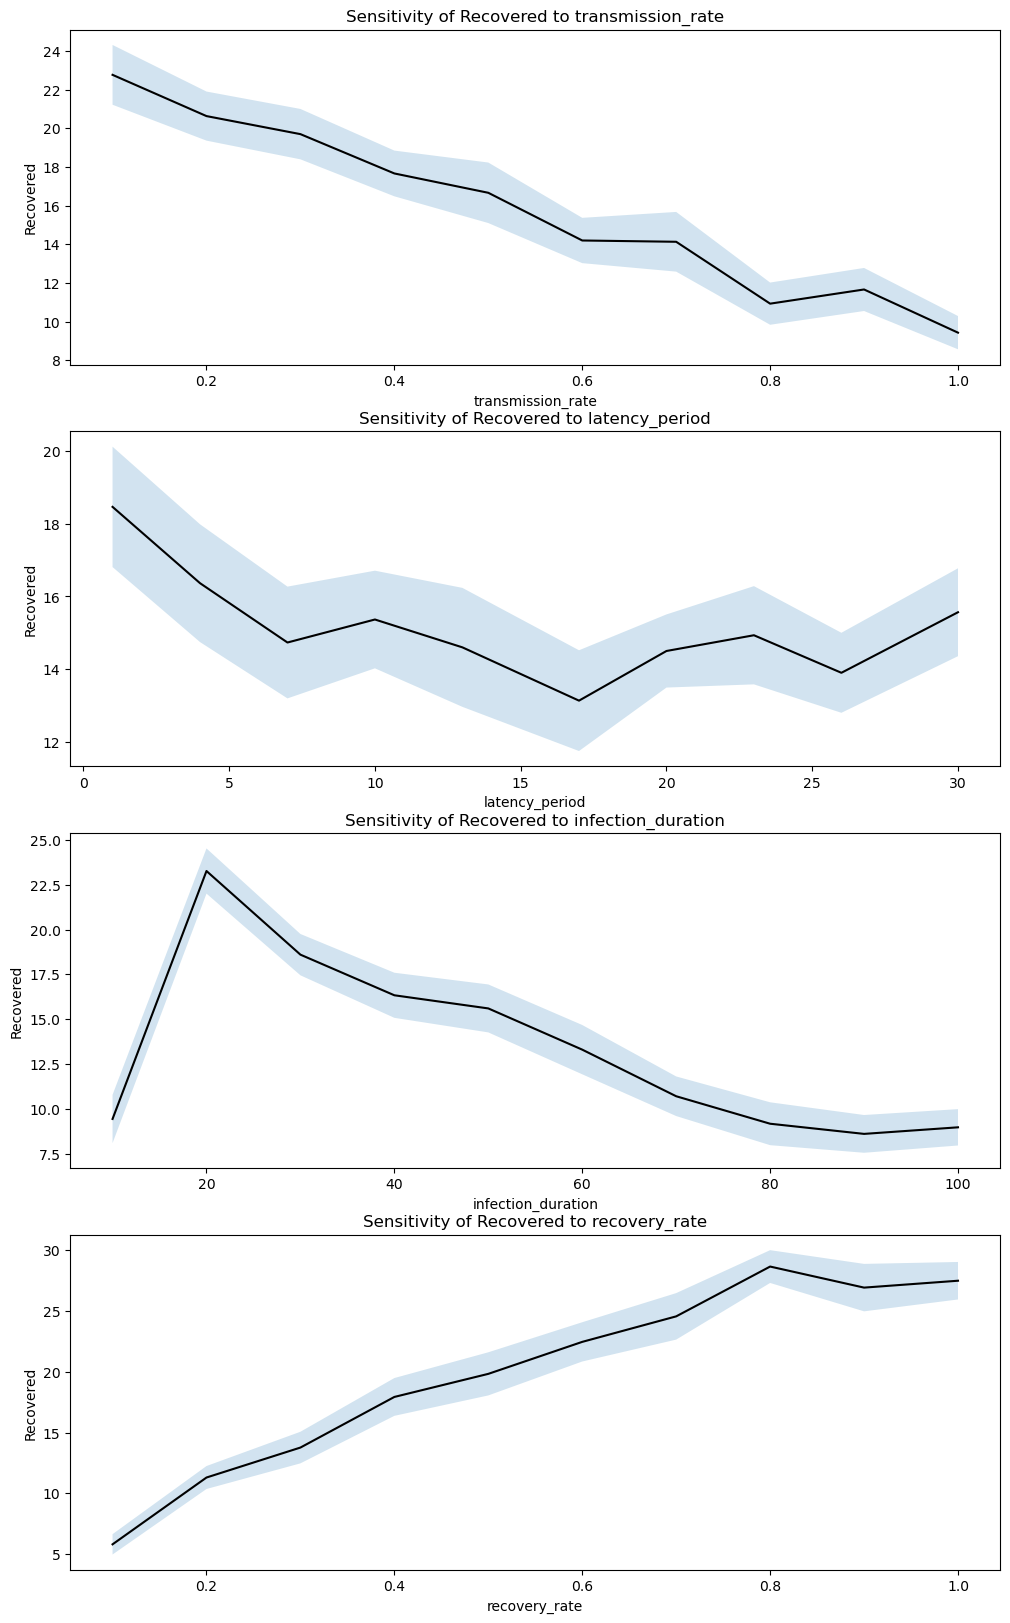

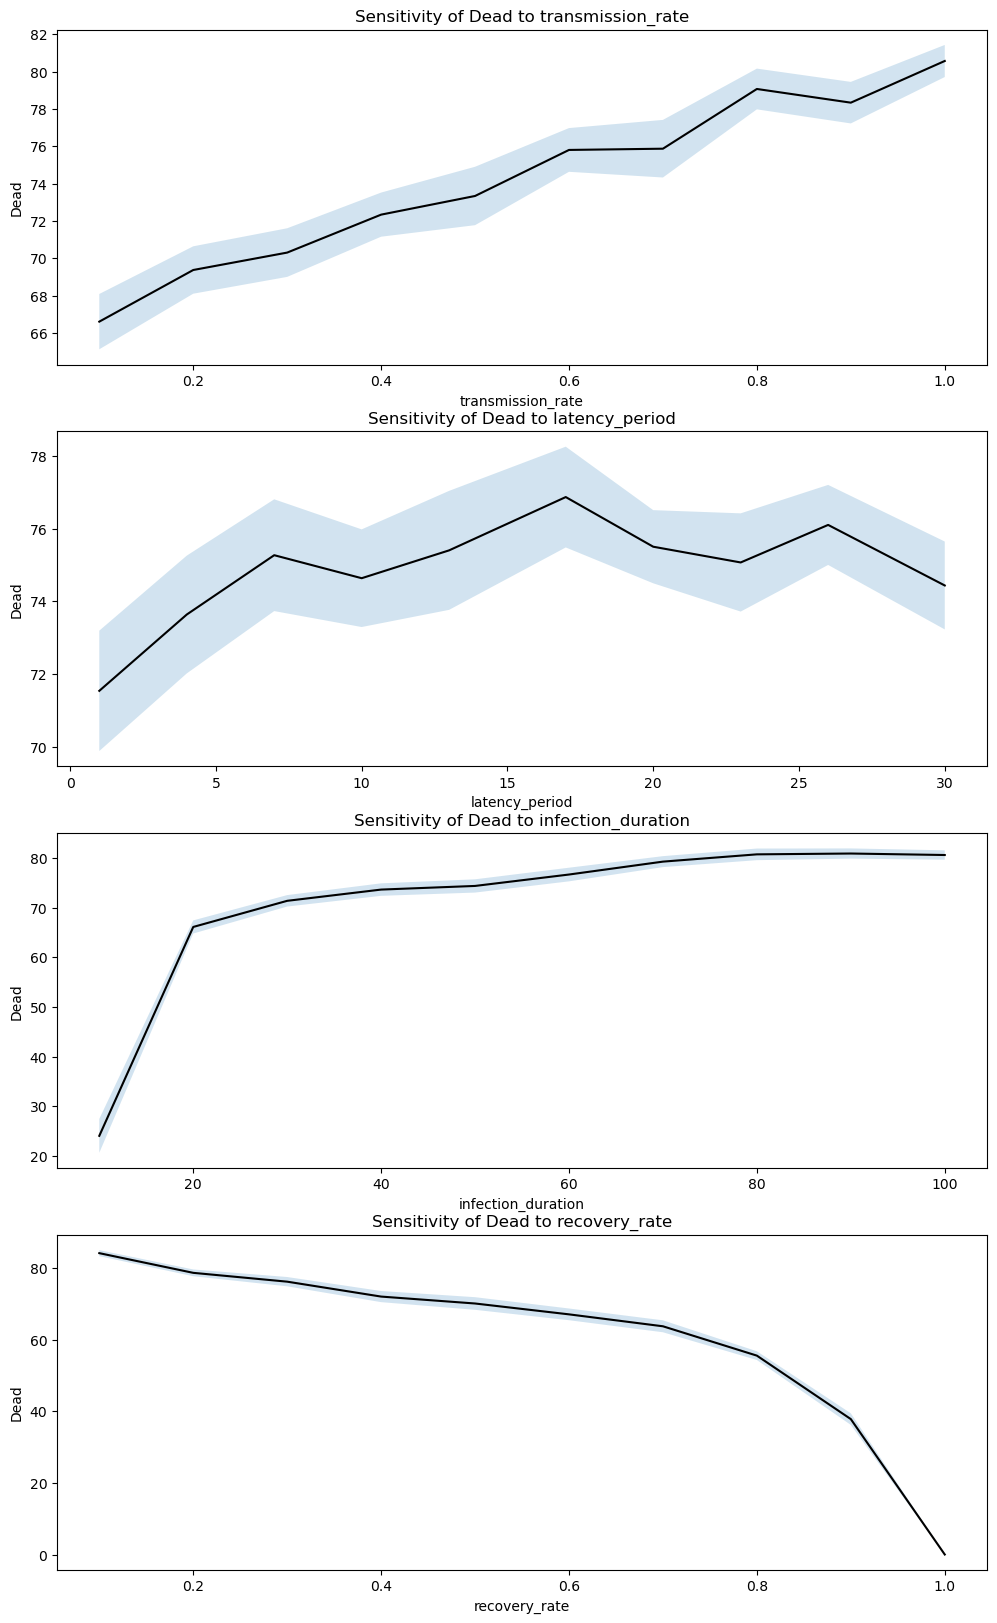

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mesa.batchrunner import FixedBatchRunner
from Environment import SIERDModel

# 定义变量和范围
problem = {
    'num_vars': 5,
    'names': ['transmission_rate', 'latency_period', 'infection_duration', 'recovery_rate'],
    'bounds': [[0.1, 1.0], [1, 30], [10, 100], [0.1, 1.0]]
}

# 设置重复次数，步数，每个变量的离散值数量
replicates = 30
max_steps = 500
distinct_samples = 10

# 固定参数
fixed_params = {
    'width': 10,
    'height': 10,
    'density': 0.9,
    'policy': "No Interventions",
    'num_districts': 5,
    'initial_infected': 1
}

# 定义输出
model_reporters = {
    "Infected": lambda m: sum([1 for agent in m.schedule.agents if agent.state == "Infected"]),
    "Recovered": lambda m: sum([1 for agent in m.schedule.agents if agent.state == "Recovered"]),
    "Dead": lambda m: sum([1 for agent in m.schedule.agents if agent.state == "Dead"])
}

data = {}

for i, var in enumerate(problem['names']):
    # 获取此变量的范围并在范围内生成<distinct_samples>个样本（均匀分布）
    samples = np.linspace(*problem['bounds'][i], num=distinct_samples)
    
    # 确保样本值为整数（如果需要）
    if var in ['latency_period', 'infection_duration', 'initial_infected']:
        samples = np.linspace(*problem['bounds'][i], num=distinct_samples, dtype=int)
    
    # 创建批量运行器
    parameters_list = []
    valid_samples = []
    for value in samples:
        params = fixed_params.copy()
        params.update({
            'transmission_rate': 0.6,  # 默认值
            'latency_period': 15,  # 默认值
            'infection_duration': 50,  # 默认值
            'recovery_rate': 0.3,  # 默认值
        })
        params[var] = value
        if var == 'initial_infected' and value >= params['width'] * params['height'] * params['density']:
            continue  # Skip values that exceed the number of agents
        parameters_list.append(params)
        valid_samples.append(value)

    print(f"Running for variable {var} with {len(parameters_list)} valid samples.")
    
    batch = FixedBatchRunner(SIERDModel,
                        max_steps=max_steps,
                        iterations=replicates,
                        parameters_list=parameters_list,
                        model_reporters=model_reporters)
    
    batch.run_all()
    
    # 收集数据并保存到 data 字典中
    df = batch.get_model_vars_dataframe()
    if not df.empty:
        df[var] = np.repeat(valid_samples, replicates)[:len(df)]
        data[var] = df.select_dtypes(include=[np.number])  # 移除非数值列
    else:
        print(f"No data collected for variable {var}")

    print(f"Data collected for {var}:")
    print(data[var].head())

# 绘制结果
def plot_param_var_conf(ax, df, var, param):
    x = df.groupby(var).mean().reset_index()[var]
    y = df.groupby(var).mean()[param]

    replicates = df.groupby(var)[param].count()
    err = (1.96 * df.groupby(var)[param].std()) / np.sqrt(replicates)

    ax.plot(x, y, c='k')
    ax.fill_between(x, y - err, y + err, alpha=0.2)

    ax.set_xlabel(var)
    ax.set_ylabel(param)

def plot_all_vars(data, param):
    f, axs = plt.subplots(len(problem['names']), figsize=(12, 20))
    
    for i, var in enumerate(problem['names']):
        plot_param_var_conf(axs[i], data[var], var, param)
        axs[i].set_title(f'Sensitivity of {param} to {var}')

for param in ('Infected', 'Recovered', 'Dead'):
    plot_all_vars(data, param)
    plt.show()
